# HW1: Practice with Python, hard-margin SVM, and linear regression

## Name: Michael Raffanti, NetID: raffanti

Hello Students:

- Start by downloading HW1.ipynb from this folder. Then develop it into your solution.
- Write code where you see "... your code here ..." below.
  (You are welcome to use more than one cell.)
- I've included the output from my solution in HW1.html so you can check your
  work. Your output should match or be close to mine. Use 3 significant
  figures for floats. e.g. We can print 3 figures for 𝜋/1000 as
  print(f'{np.pi/1000:.3}'). The pattern is print(f'{x:.precision}'),
  where x is the value to print and precision is the number of figures.
- If you have questions, please ask them in class or office hours. Our TA
  and I are very happy to help with the programming (provided you start early
  enough, and provided we are not helping so much that we undermine your learning).
- Please clean up your code:
  - Comment out unnecessary code that is useful for orienting you, like printing the data set.
  - Label your output, like writing 'weight=20.1' or 'The weight is 20.1' rather than just '20.1'.
  - Simplify your code if you can.
- When you are done, run these Notebook commands:
  - Shift-L (once, so that line numbers are visible)
  - Kernel > Restart and Run All (run all cells from scratch)
  - Esc S (save)
  - File > Download as > HTML
- Turn in:
  - HW01.ipynb to Canvas's HW01.ipynb assignment
  - HW01.html to Canvas's HW01.html assignment
  - As a check, download your files from Canvas to a new 'junk' folder. Try 'Kernel > Restart
  and Run All' on the '.ipynb' file to make sure it works. Glance through the '.html' file.
- Turn in partial solutions to Canvas before the deadline. e.g. Turn in part 1,
  then parts 1 and 2a, then your whole solution. That way we can award partial credit
  even if you miss the deadline. We will grade your last submission before the deadline.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, linear_model
from sklearn.linear_model import LinearRegression

# 1. Use a hard-margin SVM
 to classify cars as having automatic or manual transmissions.
- Read [http://www.stat.wisc.edu/~jgillett/451/01/mtcars30.csv](http://www.stat.wisc.edu/~jgillett/451/01/mtcars30.csv) into a DataFrame. (This is the mtcars data frame from R with two of its rows removed to get linearly separable data.)
  (I used df = pd.read_csv('http://www.stat.wisc.edu/~jgillett/451/01/mtcars30.csv', index_col=0).)
- Make an X from the wt (weight in 1000s of pounds) and mpg (miles per gallon) columns. Make y from the am column (where 0=automatic
  or 1=manual transmission).
- Train an SVM using kernel='linear' and C=1000. Print its coefficients and intercept.
- Report the training accuracy. (It's given by clf.score(X, y).)
- Predict the transmission for a car weighing 4000 pounds (wt=4) that gets 20 mpg.
- Use five plt.plot() calls to make a figure with wt on its x-axis and mpg on its y-axis including:
  - the automatic transmission cars in red
  - the manual transmission cars in blue
  - the decision boundary (the center line of the road)
  - the lower margin boundary (the left side of the road)
  - the upper margin boundary (the right side of the road)
  - a reasonable title, axis labels, and legend

Coefficients: [[-8.24431115 -0.30922192]]
Intercept: [32.01974189]
Training accuracy: 1.0
We predict that a car weighing 4 thousand pounds that gets 20 mpg has transmission type 0 (where 0=automatic, 1=manual).


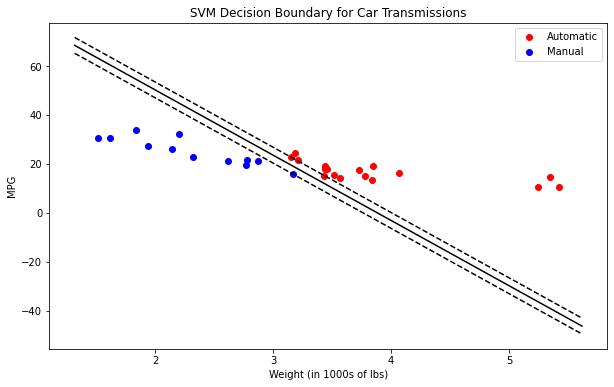

In [2]:
df = pd.read_csv('http://www.stat.wisc.edu/~jgillett/451/01/mtcars30.csv', index_col=0)
X = df[['wt', 'mpg']].values
y = df['am'].values
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

print("Coefficients:", clf.coef_)
print("Intercept:", clf.intercept_)
print("Training accuracy:", clf.score(X, y))
prediction = clf.predict(np.array([[4, 20]]))
print(f"We predict that a car weighing 4 thousand pounds that gets 20 mpg has transmission type {prediction[0]} (where 0=automatic, 1=manual).")

plt.figure(figsize=(10, 6))
plt.scatter(df[df['am']==0]['wt'], df[df['am']==0]['mpg'], color='red', label='Automatic')
plt.scatter(df[df['am']==1]['wt'], df[df['am']==1]['mpg'], color='blue', label='Manual')

ax = plt.gca()
xlim = ax.get_xlim()
xx = np.linspace(xlim[0], xlim[1])
yy = (-clf.coef_[0][0] * xx - clf.intercept_[0]) / clf.coef_[0][1]
plt.plot(xx, yy, 'k-')
yy = (-clf.coef_[0][0] * xx - clf.intercept_[0] + 1) / clf.coef_[0][1]
plt.plot(xx, yy, 'k--')
yy = (-clf.coef_[0][0] * xx - clf.intercept_[0] - 1) / clf.coef_[0][1]
plt.plot(xx, yy, 'k--')
plt.xlabel('Weight (in 1000s of lbs)')
plt.ylabel('MPG')
plt.title('SVM Decision Boundary for Car Transmissions')
plt.legend()
plt.show()

# 2. Make three linear regression models.


## 2a: Make a simple regression model by hand.
Use the matrix formula $w = (X^T X)^{-1} X^T y$ we developed in class to fit these three points:
(0, 5), (2, 1), (4, 3). (Use linear_model.linearRegression(), if you wish, to check your work.)

In [3]:
X = np.array([[0, 1], [2, 1], [4, 1]])
y = np.array([5, 1, 3])
z = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
slope, intercept = z[0], z[1]
print(f"Model equation: y = {slope:}x + {intercept:}")

Model equation: y = -0.5000000000000003x + 3.9999999999999996


## 2b: Make a simple linear regression model from real data.
Estimate the average daily trading volume of a Dow Jones Industrial Average stock from its market capitalization. That is, use $y = $ AvgVol vs. $x =$ MarketCap.
- Read [http://www.stat.wisc.edu/~jgillett/451/data/DJIA.csv](http://www.stat.wisc.edu/~jgillett/451/data/DJIA.csv) into a DataFrame.
  (I used df = pd.read_csv('http://www.stat.wisc.edu/~jgillett/451/data/DJIA.csv', index_col='Symbol').)
- Find the model. Print its equation.
- Print its $R^2$ value (the proportion of variability in $y$ accounted for by $x$ via the linear model, given by model.score(X, y)).
- Make a plot of the data and model line.
- Use the model to predict the volume for a company with market capitalization of 0.25e12 (a quarter-trillion dollars); add this as a red point on your plot.
- Say what happens to Volume as Market Capitalization increases. (Use a Markdown cell.)

Equation: y = 2.68e-05x + 3.41e+06
R2 value: 0.704564022997879


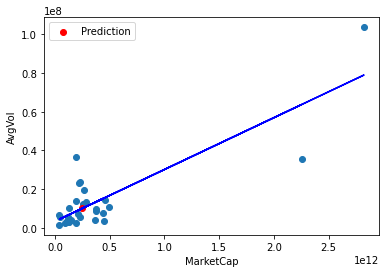

In [4]:
df = pd.read_csv('http://www.stat.wisc.edu/~jgillett/451/data/DJIA.csv', index_col='Symbol')
X = df[['MarketCap']].values
y = df['AvgVol'].values

model = LinearRegression().fit(X, y)
print(f"Equation: y = {model.coef_[0]:.2e}x + {model.intercept_:.2e}")
print(f"R2 value: {model.score(X, y):}")

plt.scatter(X, y)
plt.plot(X, model.predict(X), color='blue')
plt.xlabel('MarketCap')
plt.ylabel('AvgVol')
pred_vol = model.predict([[0.25e12]])
plt.scatter(0.25e12, pred_vol, color='red', label='Prediction')
plt.legend()
plt.show()

If the coefficient of marketcap is positive, it implies that as MarketCap increases, the volume is expected to increase.

## 2c Make a multiple regression model.
Estimate the same volume from both market capitalization and price. That is, use $y =$ AvgVol vs. $x_1 =$ MarketCap and $x_2 =$ Price.
- Find the model.
- Print its equation.
- Print its $R^2$ value.
- Say what happens to Volume as Market Capitalization increases and what happens to Volume as Price increases (while holding the other variable fixed). (Use a Markdown cell.)

In [5]:
X_vals = df[['MarketCap', 'Price']].values
model = LinearRegression().fit(X_vals, y)

print(f"Equation: y = {model.coef_[0]:.2e}*MarketCap + {model.coef_[1]:.2e}*Price + {model.intercept_:.2e}")
print(f"R2 value: {model.score(X_vals, y):.2f}")

Equation: y = 2.89e-05*MarketCap + -6.69e+04*Price + 1.44e+07
R2 value: 0.82


The coefficient of marketcap will tell us how volume changes with a unit increase in marketcap while keeping price constant. Similarly, the coefficient of price tells us how volume changes with a unit increase in price while keeping marketcap constant. In the case of this problem, as marketcap increases volume increases and as price increases volume decreases.